In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
ab=pd.read_pickle('../../Data/AB.pkl')
aab=pd.read_pickle('../../Data/AAB.pkl')

In [3]:
def truncate_germline_names(data):    
    """
    Prepare gerlmine names s.t. the format matches the V/J region names provided names
    """
    beta_v_order=np.array(['1','2','3-1','4-1','5-1','6-1','7-1','4-2','6-2','3-2','4-3','6-3','7-2','8-1','5-2','6-4','7-3','8-2','5-3','9','10-1','11-1','12-1','10-2','11-2','12-2','6-5','7-4','5-4','6-6','7-5','5-5','6-7','7-6','5-6','6-8','7-7','5-7','6-9','7-8','5-8','7-9','13','10-3','11-3','12-3','12-4','12-5','14','15','16','17','18','19','20-1','21-1','22-1','23-1','24-1','25-1','26','27','28','29-1','30'])
    alpha_v_order=np.array(['1-1','1-2','2','3','4','5','6','7','8-1','9-1','10','11','12-1','8-2','8-3','13-1','12-2','8-4','8-5','13-2','14DV4','9-2','15','12-3','8-6','16','17','18','19','20','21','22','23DV6','24','25','26-1','8-7','27','28','29DV5','30','31','32','33','26-2','34','35','36DV7','37','38-1','38-2DV8','39','40','41'])
    beta_j_order=np.array(['1-1','1-2','1-3','1-4','1-5','1-6','2-1','2-2','2-2P','2-3','2-4','2-5','2-6','2-7'])
    alpha_j_order=np.array(list(map(str,range(1,62))))

    if 'A' in data:
        which='A'
        if 'V' in data:
            order=alpha_v_order
        else:
            order=alpha_j_order
    else:
        which='B'
        if 'V' in data:
            order=beta_v_order
        else:
            order=beta_j_order
         
    if '*' in data:
        value=data[data.find(which)+2:data.find('*')]
    else:
        value=data[data.find(which)+2:]
    
    return value

In [4]:
df=aab[ab.subject==8][['a1_V','a2_V']]
df.a1_V=list(map(truncate_germline_names,df.a1_V))
df.a2_V=list(map(truncate_germline_names,df.a2_V))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [5]:
aab_12_2=df[(df.a1_V.isin(['12-1'])) & (df.a2_V.isin(['2']))].shape[0]+df[(df.a1_V.isin(['2'])) & (df.a2_V.isin(['12-1']))].shape[0]
aab_12_24=df[(df.a1_V.isin(['12-1'])) & (df.a2_V.isin(['24']))].shape[0]+df[(df.a1_V.isin(['24'])) & (df.a2_V.isin(['12-1']))].shape[0]
aab_2_24=df[(df.a1_V.isin(['2'])) & (df.a2_V.isin(['24']))].shape[0]+df[(df.a1_V.isin(['24'])) & (df.a2_V.isin(['2']))].shape[0]

In [6]:
df=ab[ab.subject==8][['a1_V']]
df.a1_V=list(map(truncate_germline_names,df.a1_V))

In [7]:
ab_12=df[df.a1_V.isin(['12-1'])].shape[0]
ab_24=df[df.a1_V.isin(['24'])].shape[0]
ab_2=df[df.a1_V.isin(['2'])].shape[0]

In [8]:
flow_data=np.array([.9,.4,.3])
seq_data=np.array([aab_12_2/(ab_12+ab_2),aab_12_24/(ab_12+ab_24),aab_2_24/(ab_2+ab_24)])*100
data=np.vstack((seq_data,flow_data)).T.astype(float)

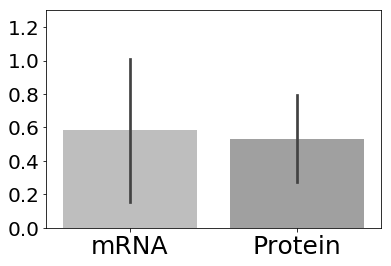

Ttest_relResult(statistic=0.2697435885771039, pvalue=0.8126401830673401)


In [9]:
sns.barplot(x='variable',y='value',data=pd.DataFrame(data).melt(),palette=['DarkGray','Gray'],alpha=.75,ci='sd')
plt.xticks(np.arange(2),['mRNA','Protein'],fontsize=25)
plt.yticks(fontsize=20)
plt.ylim([0,1.3])
plt.ylabel('')
plt.xlabel('')
plt.show()
plt.close()
print(stats.ttest_rel(data[:,0],data[:,1]))

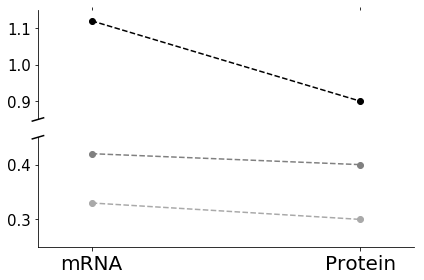

In [10]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
sns.despine()
ax.plot([0,.5],[1.12,.9],'--k',marker='o',label='12-1,2',)
ax2.plot([0,.5],[.42,.4],'--',color='Gray',marker='o',label='12-1,24')
ax2.plot([0,.5],[.33,.3],'--',color='DarkGray',marker='o',label='24,2')
ax.set_ylim(.85, 1.15) 
ax2.set_ylim(0.25, .45)
ax.set_xlim([-.1, .6]) 
ax2.set_xlim([-.1, .6])
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=0)
ax.yaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
plt.xticks([0,.5],['mRNA','Protein'],fontsize=20)
d = .015  
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)      
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs) 
plt.tight_layout()
plt.savefig('{}.eps'.format('/Users/jac/Documents/Allelic_Inclusion_Figures/Fig2F'),format='eps', dpi=1200,transparent=True)
plt.show()
plt.close()